In [7]:
from selenium import webdriver
import time
import os
import pandas as pd
import openpyxl
import seaborn as sns   
import matplotlib.pyplot as plt

In [4]:
def kto_to_excel():
    url = 'http://kto.visitkorea.or.kr/kor/notice/data/statis/profit/notice/inout/popup.kto'
    driver = webdriver.Chrome("./chromedriver.exe")
    driver.get(url)
    time.sleep(3)
    category = driver.find_element_by_xpath('//*[@id="gubun_2"]')
    category.click()
    purpose = driver.find_element_by_xpath('//*[@id="gubun_2"]/option[2]')
    purpose.click()
    monthly = driver.find_element_by_xpath('//*[@id="mothRadio01"]')
    monthly.click()
    for i in range(8):
        driver.find_element_by_xpath('//*[@id="yyyy"]').click()
        year = driver.find_element_by_css_selector('#yyyy > option:nth-child({})'.format(str(i+1)))
        year.click()
        year_int = year.text
        for i in range(12):
            try:
                driver.find_element_by_xpath('//*[@id="mm"]').click()
                month = driver.find_element_by_css_selector('#mm > option:nth-child({})'.format(str(i+1)))
                month.click()
                month_int = month.text
                search = driver.find_element_by_xpath('//*[@id="popContents"]/form[1]/fieldset/div/div[2]/a/img')
                search.click()
                table = pd.read_html(driver.page_source)[0]
                table.to_excel("./Excel/kto_visitor_stat_{}-{}.xlsx".format(year_int, month_int))
            except:
                driver.refresh()
            time.sleep(5)


In [86]:
def kto_translate(first, second):
    myworkbook = openpyxl.load_workbook('./Excel/kto_visitor_stat_2013-01.xlsx')
    worksheet = myworkbook.get_sheet_by_name('Sheet1')
    global country_list
    global header
    country_list = []
    for i in range(2, 73):
        value = worksheet.cell(i, 2).value
        text = driver.find_element_by_xpath(first)
        text.clear()
        text.send_keys(value)
        time.sleep(1)
        english = driver.find_element_by_xpath(second)
        english = english.text
        country_list.append(english)

    country_list[25] = 'Asia Etc'
    country_list[31] = "Americas Etc"
    country_list[32] = "Europe"
    country_list[55] = "Europe Etc"
    country_list[59] = "Oceania Etc"
    country_list[62] = "Africa Etc"
    country_list[65] = "Oversea Korean Total"
    country_list[66] = "Oversea Korean"

    header = ['Nationality', 'Tour', 'Business', 'Official Business', 'International Student', 'Etc', 'Total']


In [44]:
def kto_excel_to_english(yy, mm):
    file_path = file_path = './Excel/kto_visitor_stat_{}-{}.xlsx'.format(str(yy), str(mm).zfill(2))
    myworkbook = openpyxl.load_workbook(file_path)
    worksheet = myworkbook.get_sheet_by_name('Sheet1')

    for i in range(2, 73):
        worksheet['B{}'.format(i)].value = country_list[i-2]

    for i in range(7):
        header_columns = ['B', 'C', 'D', 'E', 'F', 'G', 'H']
        worksheet['{}1'.format(header_columns[i])].value = header[i]
        
    myworkbook.save(filename = file_path)

In [66]:
def create_kto_total(yy, mm):
    file_path = file_path = './Excel/kto_visitor_stat_{}-{}.xlsx'.format(str(yy), str(mm).zfill(2))

    df = pd.read_excel(file_path, header = 0, skipfooter= 4, usecols = 'B:H')

    df['Year/Month'] = '{}-{}'.format(yy, mm)

    ignore_list = ['Asia', 'Americas', 'Europe', 'Oceania', 'Africa', 'Other continents', 'Oversea Korean Total']
    condition = (df.Nationality.isin(ignore_list)==False)
    df_country = df[condition].reset_index(drop=True)

    continents = ['Asia']*25 + ['Americas']*5 + ['Europe']*23 + ['Oceania']*3 + ['Africa']*2 + ['Other continets'] + ['Oversea Korean']
    df_country['Continent'] = continents

    df_country['Tourist Ratio(%)'] = round(df_country.Tour/df_country.Total*100,1)

    tourist_sum = sum(df_country.Tour)
    df_country['Total Ratio(%)'] = round(df_country.Tour/tourist_sum*100, 1)

    return(df_country)

In [16]:
def kto_time_series_graph(country):
    country_list = country.split()
    for a in country_list:
        condition = (df['Nationality'] == a)
        df_filter = df[condition]

        plt.figure(figsize=(12, 4))
        plt.plot(df_filter['Year/Month'], df_filter['Tour'])
        plt.title('Trend of Tourist from {}'.format(a))
        plt.xlabel('Year/Month')
        plt.ylabel('Number of Tourist')
        plt.xticks(['2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01','2020-01'])
        plt.show()

In [17]:
def kto_heatmap(country):
    country_list = country.split()
    for a in country_list:
        df['Year'] = df['Year/Month'].str.slice(0,4)
        df['Month'] = df['Year/Month'].str.slice(5,7)
        condition = (df['Nationality']==a)
        df_filter = df[condition]

        df_pivot = df_filter.pivot_table(values = 'Tour', index = 'Year', columns = 'Month')

        plt.figure(figsize=(16,10))

        sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')

        plt.title('Heatmap of Tourist from {}'.format(a))

        plt.show()

In [107]:
kto_to_excel()

In [108]:
url = 'https://translate.google.com/?hl=en&tab=TT'
driver = webdriver.Chrome("./chromedriver.exe")
driver.get(url)

In [110]:
kto_translate('//*[@id="yDmH0d"]/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[2]/c-wiz[1]/span/span/div/textarea', '//*[@id="yDmH0d"]/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[2]/c-wiz[2]/div[5]/div/div[1]/span[1]/span/span')

In [111]:
for yy in range(2013, 2021):
    for mm in range(1, 13):
        try:
            kto_excel_to_english(str(yy), str(mm).zfill(2))
        except:
            pass

In [112]:
df = pd.DataFrame()
for yy in range(2013, 2021):
    for mm in range(1, 13):
        try:
            temp = create_kto_total(str(yy), str(mm).zfill(2))
            df = df.append(temp, ignore_index=True)
        except:
            pass

In [113]:
df.to_excel('./Excel/kto_total.xlsx', index=False)

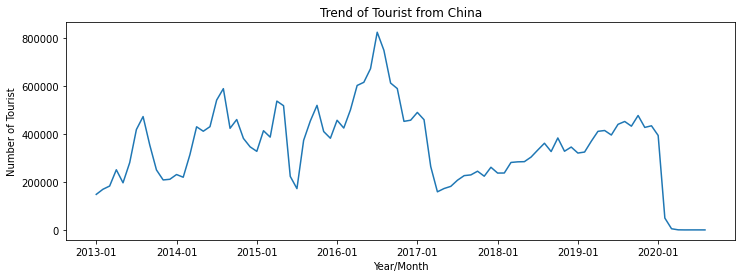

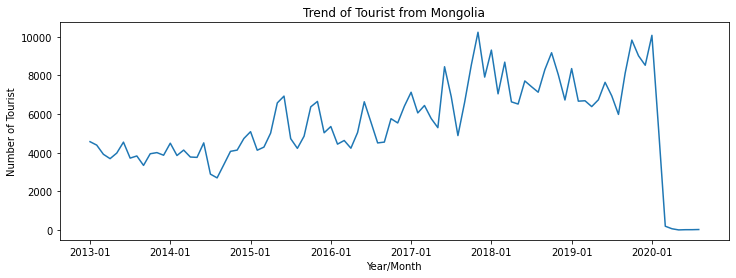

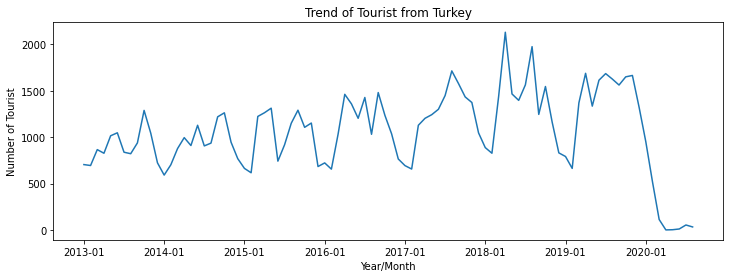

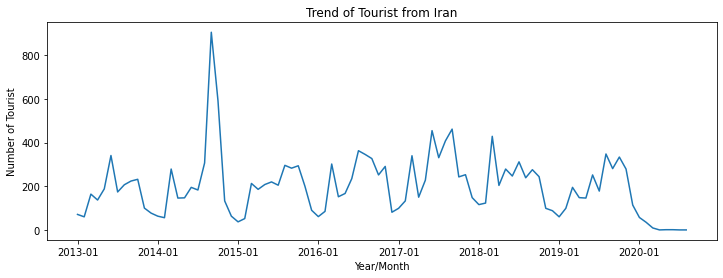

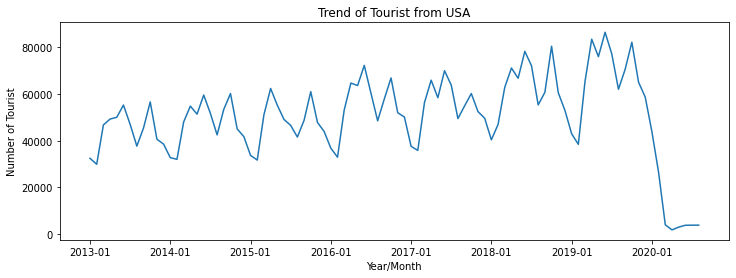

In [114]:
kto_time_series_graph('China Mongolia Turkey Iran USA')

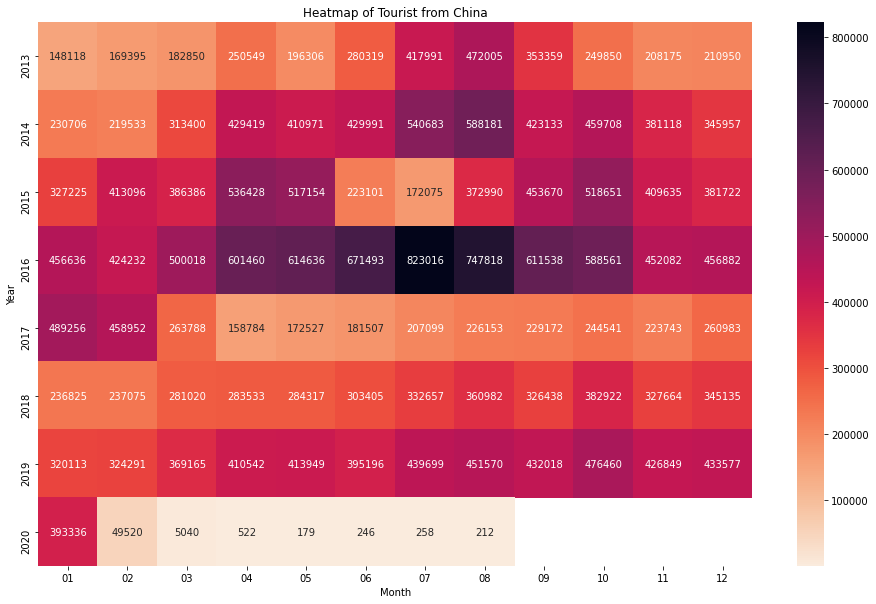

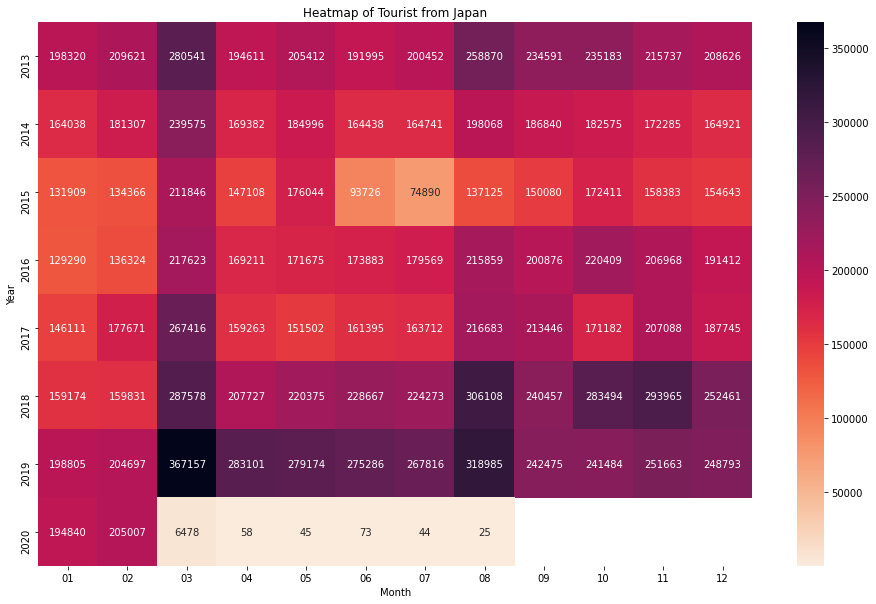

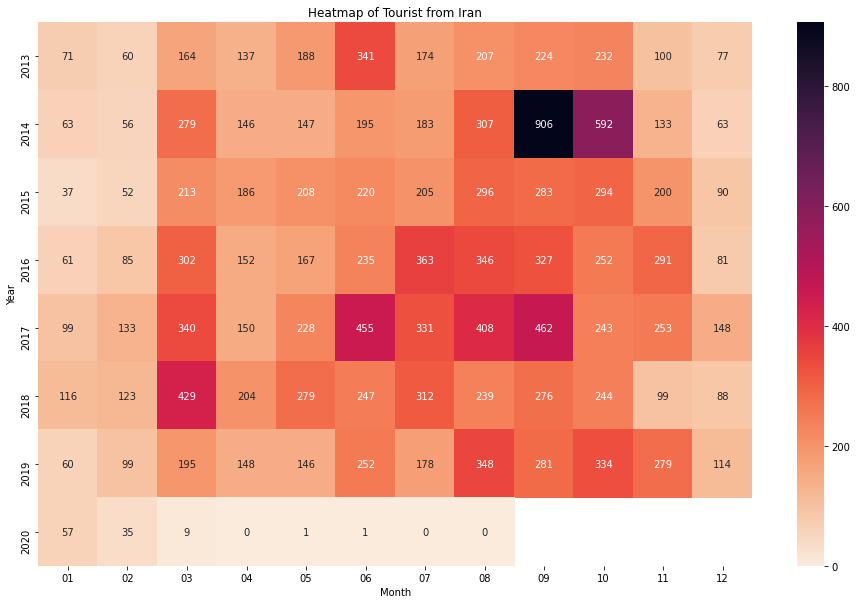

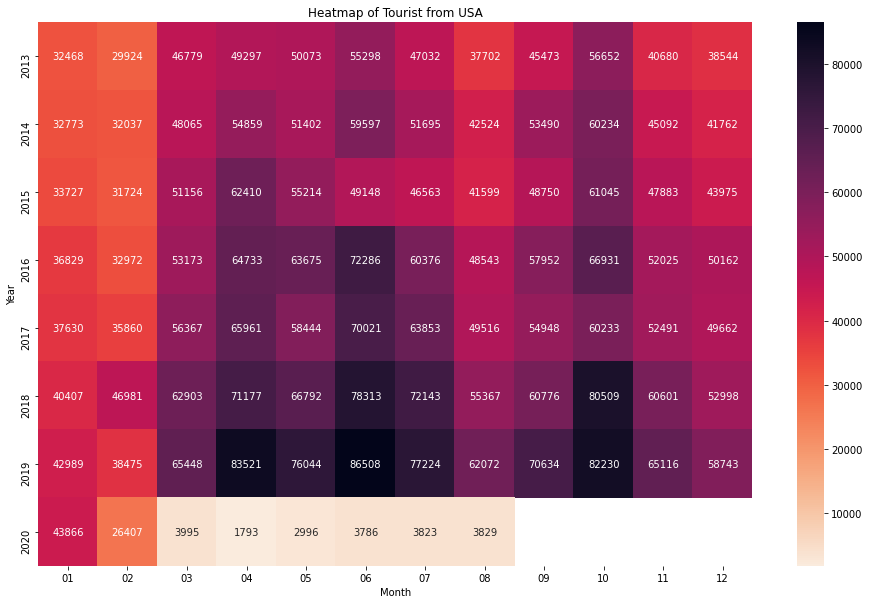

In [116]:
kto_heatmap('China Japan Iran USA')